## 1、This report is going to research the correlation between return of Bitcoin and SP500 index and to calculate the Conditonal Value at risk 

１）Create a graph that shows the source, duration, mean, variance, maximum, minimum, and characteristics of the data.

 Bitcoin https://datahub.io/cryptocurrency/bitcoin#resource-bitcoin  
SP500 https://datahub.io/core/s-and-p-500-companies

In [2]:
#load data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('bitcoin_csv.csv', index_col='date', date_parser=dateparse, dtype='float')
data.head()
data=data[["price(USD)"]].dropna()
ts=data["price(USD)"]

SP500=pd.read_csv("data_csv.csv", index_col='Date', date_parser=dateparse, dtype='float')

SP500.head()
SP500=SP500[["SP500"]].dropna()
data2=pd.concat([SP500,ts],axis=1).dropna()


In [6]:
ts.dropna()
#Chat1

date
2013-04-28     135.30
2013-04-29     134.44
2013-04-30     144.00
2013-05-01     139.00
2013-05-02     116.38
               ...   
2018-11-18    5559.74
2018-11-19    5620.78
2018-11-20    4863.93
2018-11-21    4465.54
2018-11-22    4611.57
Name: price(USD), Length: 2035, dtype: float64

In [7]:
from datetime import datetime

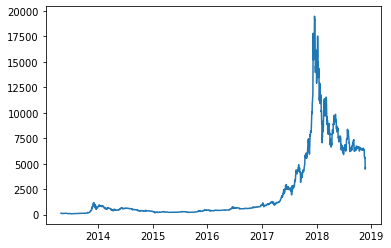

In [8]:
plt.plot(ts)
#Chart 2, Bitcoin transition, analysis after April 28, 2013

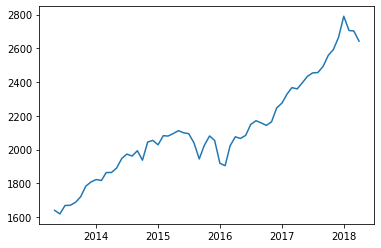

In [9]:
plt.plot(data2["SP500"])
#Chart 3, SP500 transition, analysis after April 28, 2013

In [10]:
data2["price(USD)"].describe()
#Chart 4
#Bitcoin Draw data features

count       60.000000
mean      1648.725833
std       2968.558285
min         97.510000
25%        279.355000
50%        504.450000
75%        996.132500
max      14112.200000
Name: price(USD), dtype: float64

In [11]:
#Chart 5
# SP500 Draw the features of the data
data2["SP500"].describe()

count      60.000000
mean     2113.649333
std       290.389374
min      1618.770000
25%      1932.602500
50%      2077.765000
75%      2288.817500
max      2789.800000
Name: SP500, dtype: float64

２）Make an estimation of the AR model. Show the information criterion and the LB test value in the estimation results.

In [13]:
#Estimate the price of Bitcoin for AR model
import statsmodels.api as sm
model = sm.tsa.AR(data2["price(USD)"])
# AICmodel selection
print(model.select_order(maxlag=6, ic='aic'))  
# output:3

# estimeate
result = model.fit(maxlag=3)
print(result.params)

print(result.sigma2)
#Chat6

3
const            209.590064
L1.price(USD)      1.085561
L2.price(USD)      0.109752
L3.price(USD)     -0.305988
dtype: float64
1043693.1029450207


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [14]:
def make_lbtest_df(test_data, lags=10):
    test_result = sm.stats.diagnostic.acorr_ljungbox(test_data, lags=lags)
    lbtest_df = pd.DataFrame({
        "Q": test_result[0],"p-value": test_result[1]})
    lbtest_df = lbtest_df[["Q", "p-value"]]
    return lbtest_df

In [15]:
# Ljung-Box test for residuals
resid202 = result.resid
print("Mean of residual error is",resid202.mean())
lbtest202 = make_lbtest_df(resid202)
lbtest202.index = range(1, 11)
lbtest202
#Chat7

Mean of residual error is -1.3243519341605798e-12


,Q,p-value
1,0.020652,0.885731
2,0.047101,0.976724
3,0.148790,0.985399
4,0.698085,0.951565
5,1.936138,0.857909
6,2.636371,0.852904
7,2.685976,0.912454
8,2.914902,0.939584
9,2.925839,0.967163
10,2.926488,0.983101


The average residual was -1.32 X 10 ** -12. In addition, since the P values of the Ljung-Box test results up to k = 10 are all larger than 0.05, we pay attention to the p value, and therefore, it can be seen that the null hypothesis is adopted under the significance level of 5%. .. In other words, the null hypothesis that the series correlation between the 1st and 10th periods is 0 cannot be rejected.

３）　＊２）Prediction 80 periods ahead using the estimation results of the AR model

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


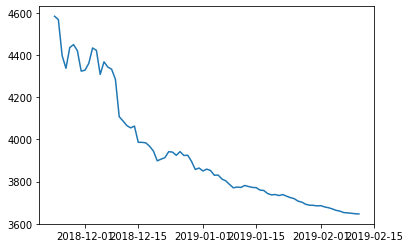

In [16]:
from statsmodels.tsa.ar_model import AR
ar = AR(data).fit(ic='aic')
#Predict
ar_predict = ar.predict(start=2035,end=2035+80)


#Plot
plt.plot( ar_predict)
#Chat8

４）Estimate the VAR model

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
#Granger causality estimation
maxlag = 1
results = grangercausalitytests(data2, maxlag,verbose=1) # x: 2darray (number of data, 2), x [:, 0] => Test causality to x [:, 1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1639  , p=0.6871  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=0.1727  , p=0.6777  , df=1
likelihood ratio test: chi2=0.1724  , p=0.6779  , df=1
parameter F test:         F=0.1639  , p=0.6871  , df_denom=56, df_num=1


Since the p_value is greater than the standard (such as 0.05), it can be said that there is no Granger causality of x1 => x2.

In [19]:
#ARC estimate
from statsmodels.tsa.vector_ar.var_model import VAR

import matplotlib as mpl
font = {"family":"IPAexGothic"}
mpl.rc('font', **font)
plt.rcParams["font.size"] = 12

In [20]:
#Calculate the logarithmic difference series to create a price-earnings ratio (PER) DataFrame
per=pd.DataFrame(np.log(data2.iloc[:,:]).diff(),index=data2.index[1:])
per.head()
#Chat9

,SP500,price(USD)
2013-06-01,-0.012932,-0.076058
2013-07-01,0.030366,-0.278461
2013-08-01,0.000845,0.085463
2013-09-01,0.010175,0.240893
2013-10-01,0.019289,-0.018371


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


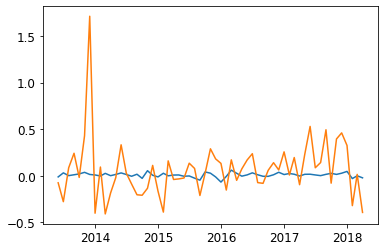

In [21]:
plt.plot(per)
#Chat0

In [22]:
# Estimate the VAR model from period 0 to period 10
var=[]
for i in range(11):
     var.append(VAR(per[['SP500','price(USD)']]).fit(maxlags=i))

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % 

In [23]:
aic=[]
for i in range(11):
    aic.append(var[i].aic)
pd.Series(aic,index=range(11),name='AIC')
#In Chart 11, use VAR (7) because VAR (7) is the smallest

0     -9.896194
1     -9.815293
2     -9.774041
3     -9.611445
4     -9.456568
5     -9.349585
6     -9.290848
7    -10.052151
8    -10.030830
9     -9.885720
10    -9.910703
Name: AIC, dtype: float64

5) Draw an impulse response function based on the result estimated in * 3) and make some interpretation. (Choose one or two variables yourself.)

In [24]:
irf=var[7].irf(10).orth_irfs
interval=var[7].irf_errband_mc(orth=True,T=10,signif=0.05)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'T' keyword is deprecated, use 'steps' instead
  


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


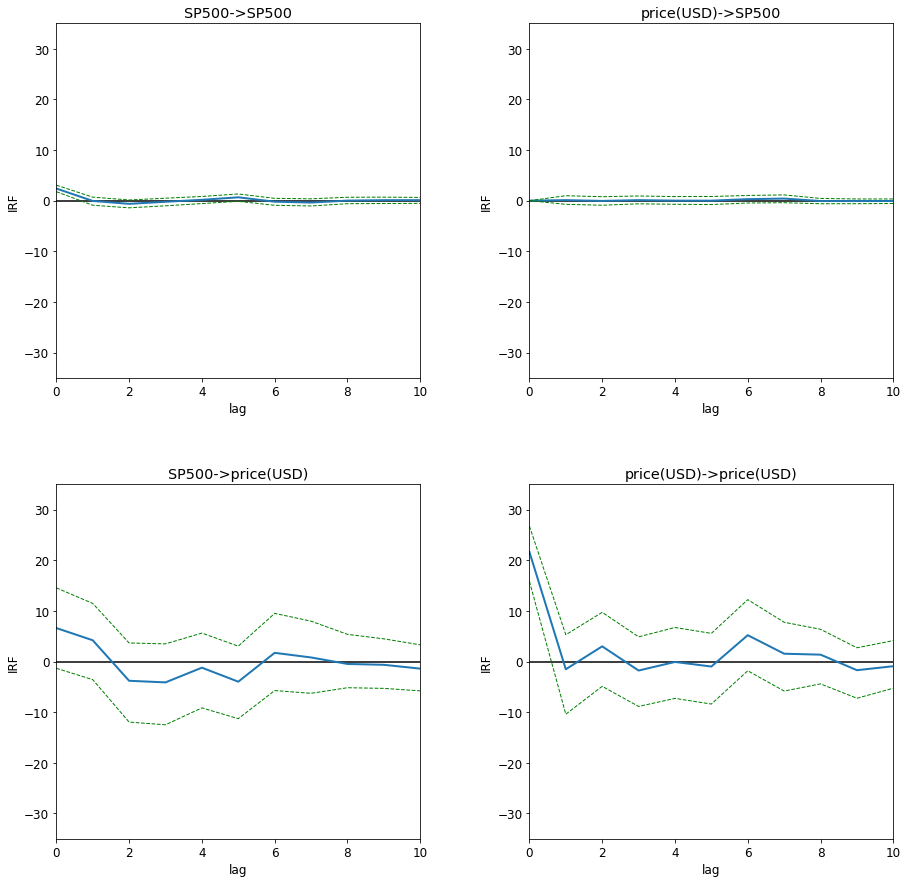

In [25]:
names=['SP500','price(USD)']
fig,ax=plt.subplots(2,2,figsize=[15,15])
for i in range(2):
    for j in range(2):
        ax[i,j].plot(irf[:,i,j]*100,linewidth=2)
        ax[i,j].plot(interval[0][:,i,j]*100,linestyle='dashed',color='green',linewidth=1)
        ax[i,j].plot(interval[1][:,i,j]*100,linestyle='dashed',color='green',linewidth=1)
        ax[i,j].hlines(0,0,10)
        ax[i,j].set_xlim(0,10)
        ax[i,j].set_ylim(-35,35)
        ax[i,j].set_xlabel('lag',fontsize=12)
        ax[i,j].set_ylabel('IRF',fontsize=12)
        ax[i,j].set_title('%s->%s'%(names[j],names[i]))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
#図１２

Looking at the SP500-> price, looking at the impact of the SP500 index, that is, the entire stock, on the Bitcoin market, the IRF was 7.5% in the 0th period, and after the 2nd period, it turned negative to -5.5. The result was that it fell and returned to positive after the 6th term. Also, looking at price (USD)-> price (USD), IRF is about 20% in the 0th period. In other words, if the PER of the SP500 index rises by 7.5%, the PER of the Bitcoin index will rise by 20%, suggesting that it will not affect after 6 days.

In [26]:
#Calculate relative variance contribution (RVC)
decomp=var[7].fevd(11).decomp

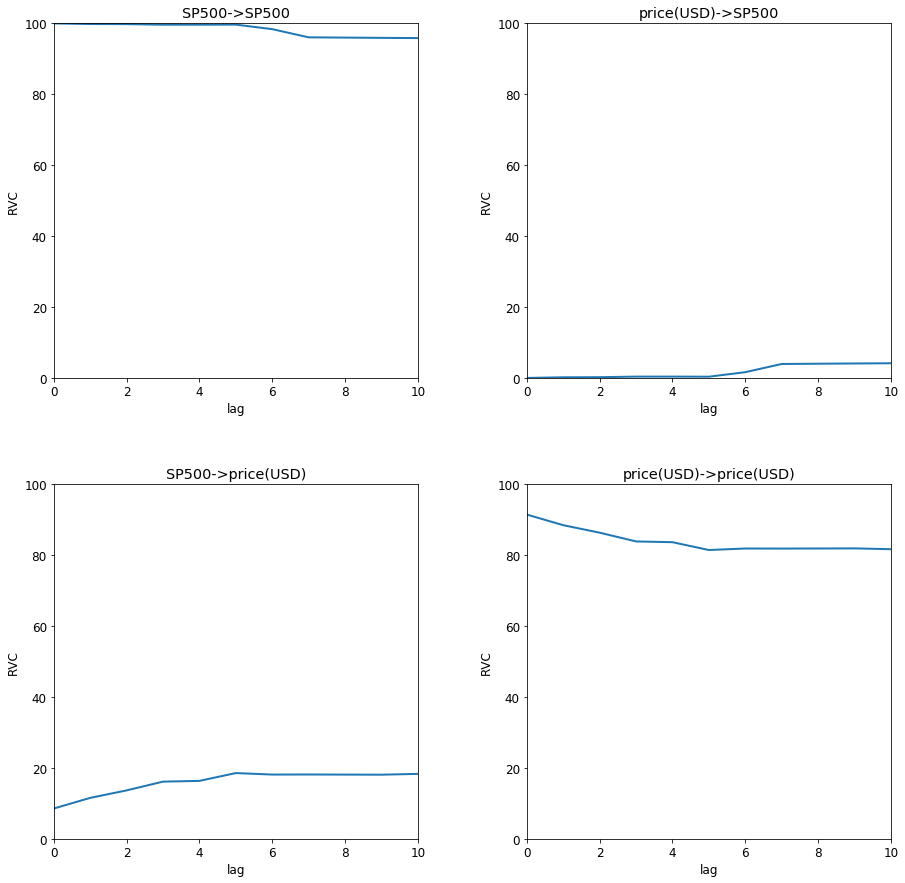

In [27]:
names=['SP500','price(USD)']
fig,ax=plt.subplots(2,2,figsize=[15,15])
for i in range(2):
    for j in range(2):
        ax[i,j].plot(decomp[i,:,j]*100,linewidth=2)
        ax[i,j].set_xlim(0,10)
        ax[i,j].set_ylim(0,100)
        ax[i,j].set_xlabel('lag',fontsize=12)
        ax[i,j].set_ylabel('RVC',fontsize=12)
        ax[i,j].set_title('%s->%s'%(names[j],names[i]))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
#Chat１３

Analysis: SP500 vs. Bitcoin stock fluctuations contribute only 20%. On the contrary, it was found that Bitcoin has almost no contribution of stock fluctuations to the SP500.

７）　Test of the causality of Granger based on the results estimated in＊３）

In [28]:
names=['SP500','price(USD)']
stat=[]
pval=[]
null=[]
for i in range(2):
    for j in range(2):
        if i!=j:
            test=var[7].test_causality(i,j,kind='f',signif=0.05)
            stat.append(test.test_statistic.round(1))
            pval.append(test.pvalue.round(3))
            null.append('%s->%s'%(names[j],names[i]))
        else:
            pass
pd.DataFrame({'Statistics':stat,'P_value':pval},index=null,columns=['Statistics','P_value']).T
#図１１

,price(USD)->SP500,SP500->price(USD)
Statistics,0.800,0.800
P_value,0.624,0.599


The Granger causality test did not reject the null hypothesis at the 5% significance level, suggesting that there is no Granger causality.
In other words, it is not significant in predicting PER.

８）　ADF test

In [34]:
# Unit root test Bitcoin
adf_result1 = sm.tsa.stattools.adfuller(data2["price(USD)"])
print(adf_result1)
#According to the result of # adf_result1, 0.21 is larger than 1%,% 5 and 10%, so the hypothesis is not rejected and it is necessary to take a further difference.

(0.20762983461462078, 0.972686295959034, 6, 53, {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}, 799.5106384578429)


In [35]:
# 単位根検定SP500
adf_result2 = sm.tsa.stattools.adfuller(data2["SP500"])
print(adf_result2)
#According to the result of # adf_result2, -0.38 is larger than 1%,% 5, and 10%, so the hypothesis is not rejected and it is necessary to take a further difference.

(-0.3801561061661908, 0.913359647303609, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 519.2844438088871)


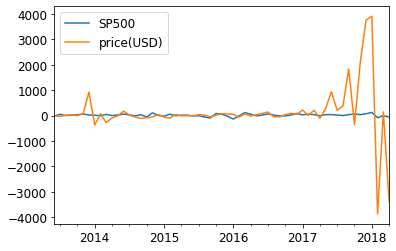

In [36]:
data3_diff=data2.diff(1)[1:]
data3_diff.plot()
# Figure 12, difference

In [37]:
# 単位根検定Bitcoin
adf_result1 = sm.tsa.stattools.adfuller(data3_diff["price(USD)"])
print(adf_result1)
#According to the result of # adf_result1, -0.05 is larger than 1%,% 5 and 10%, so the hypothesis is not rejected and it is necessary to take LOG.

(-0.05456401831741731, 0.9537802597216029, 5, 53, {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}, 780.9054639727754)


In [38]:
# 単位根検定SP500
adf_result2 = sm.tsa.stattools.adfuller(data3_diff["SP500"])
print(adf_result2)
#According to the result of # adf_result2, the hypothesis is rejected because it is -6.24, which is smaller than 1%,% 5, and 10%.

(-6.242448013984492, 4.6616115756555474e-08, 1, 57, {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}, 508.39515047986424)


(-7.0234883809655235, 6.452906479685361e-10, 0, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, -9.29583130094511)


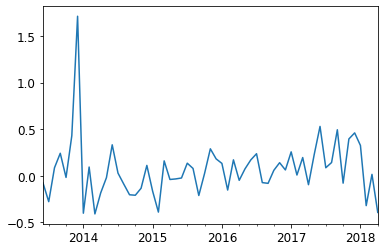

In [39]:
# Unit root test Bitcoin
#Log diff
data4_diff=np.log(data2).diff(1)[1:]
adf_result1 = sm.tsa.stattools.adfuller(data4_diff["price(USD)"])
print(adf_result1)
data4_diff['price(USD)'].plot()
#According to the result of # adf_result1, -7.02 is smaller than 1%,% 5, and 10%, so the hypothesis is rejected.

9 ) EGARCH (1,1) model using Bitcoin data

Text(0.5, 1.0, 'Bitcoin Returns')

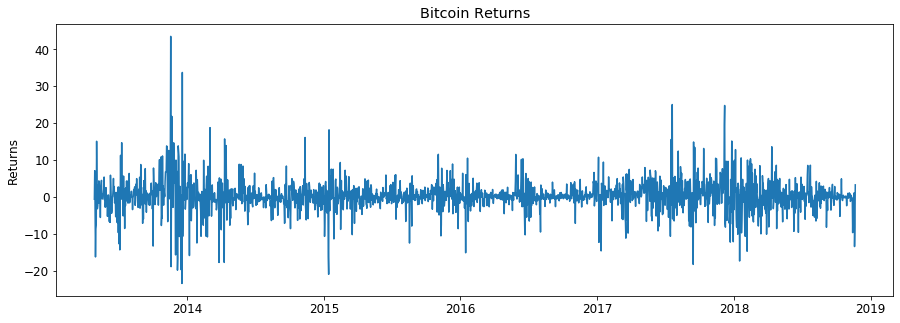

In [40]:
returns =100*ts.pct_change().dropna()
returns = pd.DataFrame(returns)
returns.index = ts.index.values[0:returns.shape[0]]
returns.columns = ['Bitcoin Returns']

plt.figure(figsize=(15,5))
plt.plot(returns.index,returns)
plt.ylabel('Returns')
plt.title('Bitcoin Returns')

In [41]:
from arch import arch_model
am = arch_model(returns, vol='EGARCH', p=1, q=1,dist='Normal')
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5534.199331767999
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5525.74355985383
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5513.665140664445
Iteration:      4,   Func. Count:     36,   Neg. LLF: 5509.835665905199
Iteration:      5,   Func. Count:     44,   Neg. LLF: 5506.827241772251
Iteration:      6,   Func. Count:     50,   Neg. LLF: 5501.465658771793
Iteration:      7,   Func. Count:     57,   Neg. LLF: 5500.980262047378
Iteration:      8,   Func. Count:     63,   Neg. LLF: 5500.621538779474
Iteration:      9,   Func. Count:     69,   Neg. LLF: 5500.4426545834485
Iteration:     10,   Func. Count:     75,   Neg. LLF: 5500.438338662001
Iteration:     11,   Func. Count:     81,   Neg. LLF: 5500.438271588168
Iteration:     12,   Func. Count:     87,   Neg. LLF: 5500.438266893778
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5500.438266888734
            Iterations: 12


## 10) Using the results estimated in 9), simulate the predicted values for the third period ahead and create a histogram of the simulated values. Calculate 5% Condition Value at Risk from the simulated value

In [42]:
forecasts = res.forecast(method='simulation', simulations=365*3,horizon=5)
forecasted=forecasts.variance.dropna()

Text(0.5, 1.0, 'Bitcoin Returns')

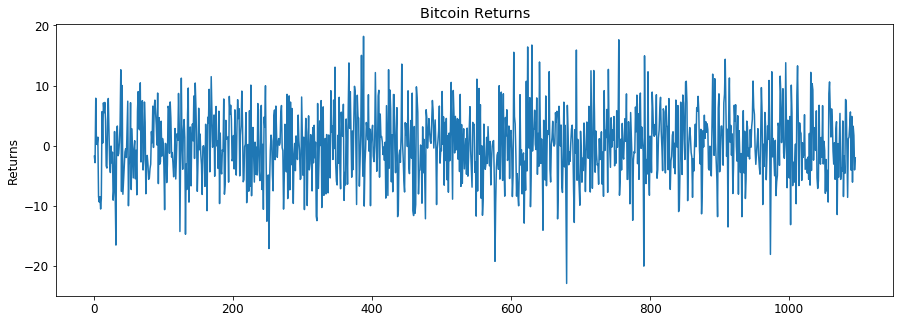

In [43]:
plt.figure(figsize=(15,5))
plt.plot(np.array(range(len(forecasts.simulations.values[-1,:,-1])))+1,forecasts.simulations.values[-1,:,-1])
plt.ylabel('Returns')
plt.title('Bitcoin Returns')
#Chat１４

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


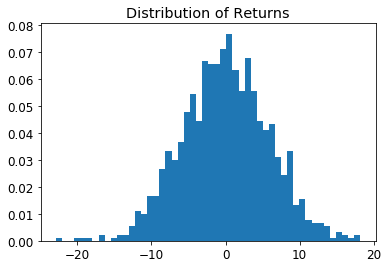

In [44]:
# print(np.percentile(forecasts.simulations.values[-1,:,-1].T,5))
plt.hist(forecasts.simulations.values[-1,:,-1],bins=50,normed=True)
plt.title('Distribution of Returns')
plt.show()

In [45]:
forecasts.simulations.values[-1,:,-1]

array([-1.74455022, -2.82081934,  7.89681521, ...,  1.68134016,
       -4.0181079 , -2.01331821])

In [46]:
forecasts.simulations.values[-1,:,-1]

array([-1.74455022, -2.82081934,  7.89681521, ...,  1.68134016,
       -4.0181079 , -2.01331821])

In [48]:
var_level = 95
var_95 = np.percentile(forecasts.simulations.values[-1,:,-1], 100 - var_level)
cvar_95 = forecasts.simulations.values[-1,:,-1][forecasts.simulations.values[-1,:,-1] <= var_95].mean()
cvar_95

-12.010974233311

## 5% CValue at Risk from the simulated value is -12.010974233311%. There is a 5% chance that you will lose about 12.01%.¶

## 2, Summary

## This analysis examined Bitcoin's AR model predictions and the association between Bitcoin and the SP500 index. As a result, the AR model succeeded in predicting in a short period of time, but analysis from historical data does not admit that there is such a strong relationship between Bitcoin and the SP500 index.12.01% CVaR could be defined as extremely high risk in 5% tolerance.

## 3, Reference list

1,Basics of Predicting Time Series Data Using ARIMA Model in Python [Part 2], Browse Date 2020-01-30, https://blog.brains-tech.co.jp/entry/arima-tutorial-2

2,AR model estimation with python, viewed date 2020-01-30, https://analytics-note.xyz/time-series/statsmodels-ar/

3,Time series analysis with Python (causal reasoning), Browse date 2020-01-30, https://qiita.com/omuram/items/3d71881c5488d3aabd27
[Chapter 4] 
3,Solving the end-of-chapter problem of "Measurement time series analysis of economic and finance data" with python, Browsed 2020-01-30, https://qiita.com/mckeeeen/items/4afa1167008c1f315d0b

4,Beta-t-EGARCH models, Viewed 2020-01-30, https://pyflux.readthedocs.io/en/latest/egarch.html